In [98]:
#Jayasankar Narayanan-MIT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline


# Loading the Dataset

In [99]:
df = pd.read_csv("Automobile_data.csv")

In [100]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [102]:
df.shape

(205, 26)

In [103]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [104]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [105]:
df.describe

<bound method NDFrame.describe of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd    

# Filling in missing values

In [106]:
missing_values = df.isin(['?'])
print('Number of missing values per column:')
for col in missing_values.columns:
    if missing_values[col].sum() > 0:
        print(col, missing_values[col].sum())


Number of missing values per column:
normalized-losses 41
num-of-doors 2
bore 4
stroke 4
horsepower 2
peak-rpm 2
price 4


In [107]:
SI_mean = SimpleImputer(strategy = 'mean',missing_values='?')
SI_mode = SimpleImputer(strategy = 'most_frequent')

In [108]:
columns_to_be_filled = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
for i in columns_to_be_filled:
  df[i] = df[i].replace('?', np.nan)
for i in columns_to_be_filled:  
  df[i] = df[i].fillna(df[i].astype(float).mean())

In [109]:
df = df[df['num-of-doors'] != '?']
df.reset_index(drop=True, inplace=True)
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [110]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Univariate Analysis

In [111]:
pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


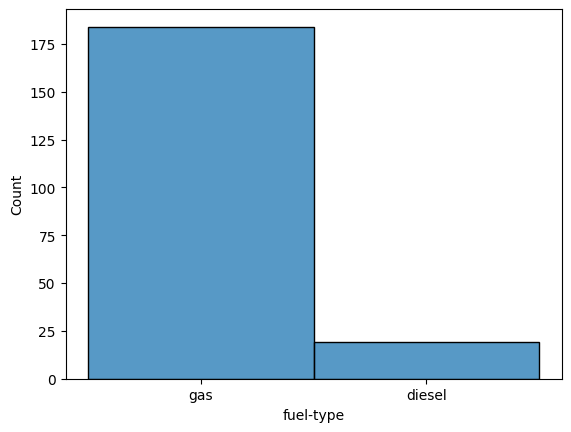

In [112]:
sns.histplot(df['fuel-type'])
plt.show()

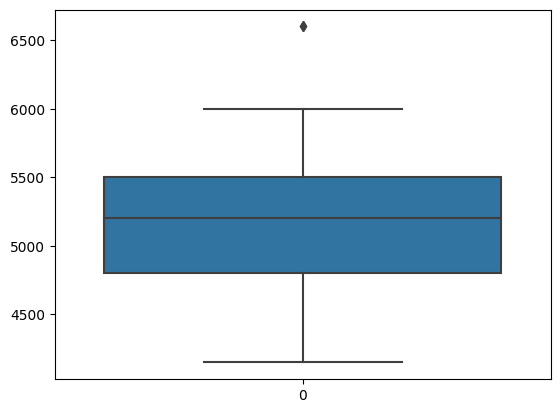

In [113]:
sns.boxplot(df['peak-rpm'])
plt.show()

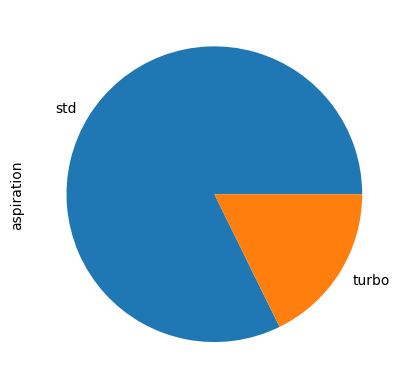

In [114]:
df['aspiration'].value_counts().plot(kind='pie')
plt.show()


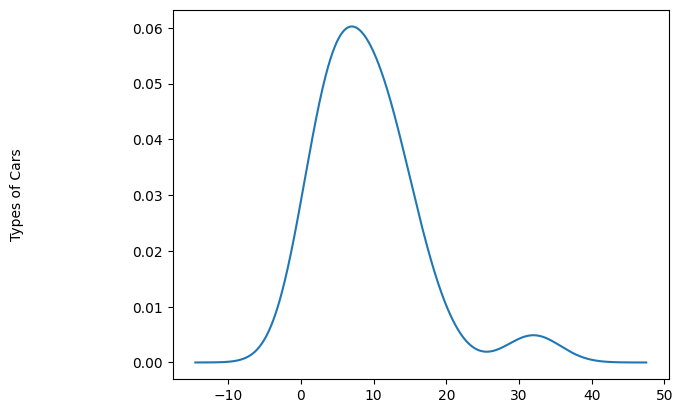

In [115]:
df['make'].value_counts().plot(kind='kde')
ax = plt.gca()

ax.set_ylabel('Types of Cars', rotation=90, labelpad=40)
ax.yaxis.set_label_coords(-0.3, 0.5)

# show the plot
plt.show()

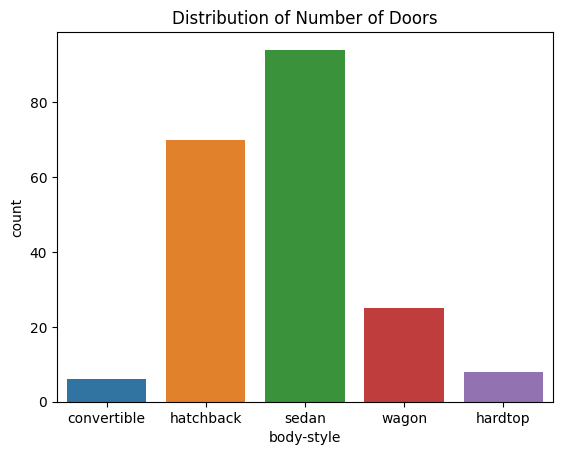

In [116]:
sns.countplot(x='body-style', data=df)
plt.title('Distribution of Number of Doors')
plt.show()


<ipython-input-117-40835aac41ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


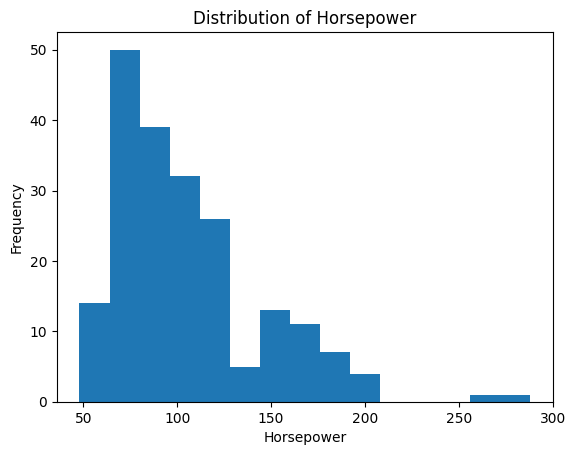

In [117]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
plt.hist(df['horsepower'], bins=15)
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')


plt.show()


# Bivariate Analysis

<ipython-input-118-d3faa79dcc5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wheel-base'] = df['wheel-base'].astype(float)
<ipython-input-118-d3faa79dcc5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['length'].astype(float)


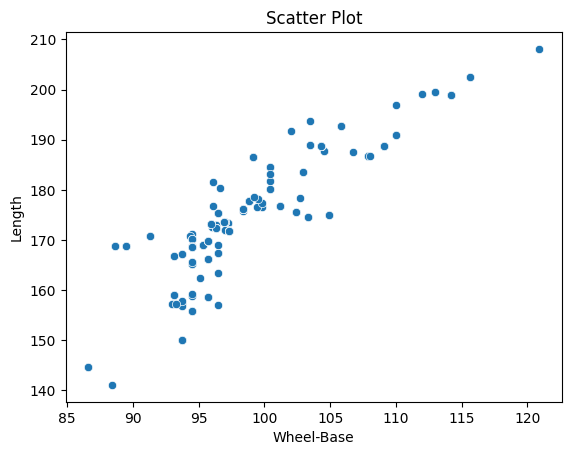

In [118]:
df['wheel-base'] = df['wheel-base'].astype(float)
df['length'] = df['length'].astype(float)

sns.scatterplot(x='wheel-base', y='length', data=df)

plt.title('Scatter Plot')
plt.xlabel('Wheel-Base')
plt.ylabel('Length')
plt.show()


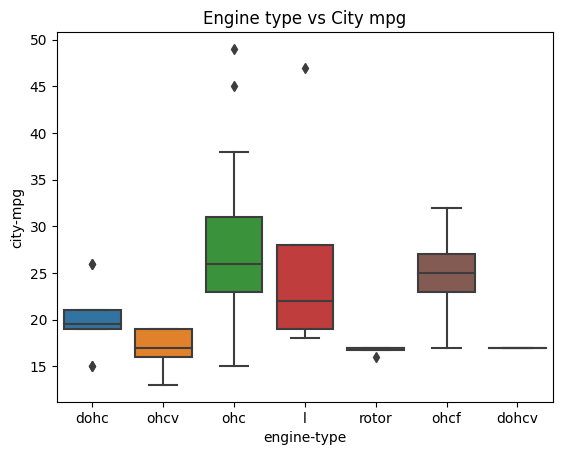

In [119]:
sns.boxplot(x="engine-type", y="city-mpg", data=df)
plt.title('Engine type vs City mpg')
plt.show()


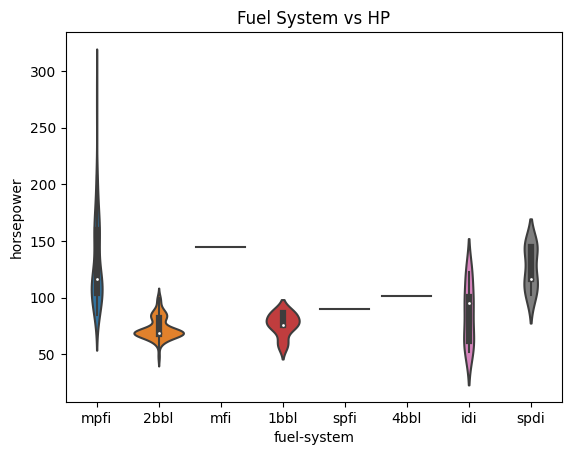

In [120]:
sns.violinplot(x="fuel-system", y="horsepower", data=df)
plt.title('Fuel System vs HP')
plt.show()


# Multivariate Analysis

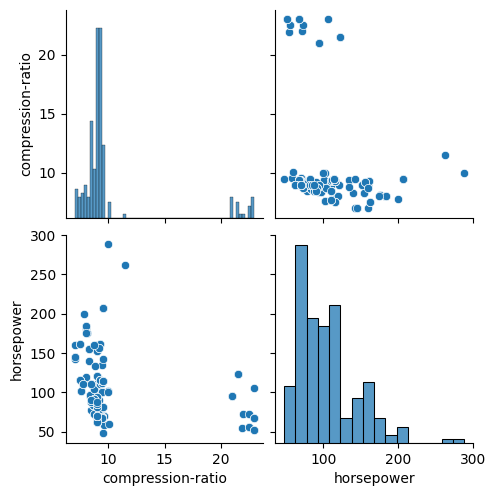

In [121]:
sns.pairplot(df[['bore','stroke','compression-ratio','horsepower','price']])
plt.show()


<ipython-input-122-5f1c574e7c14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


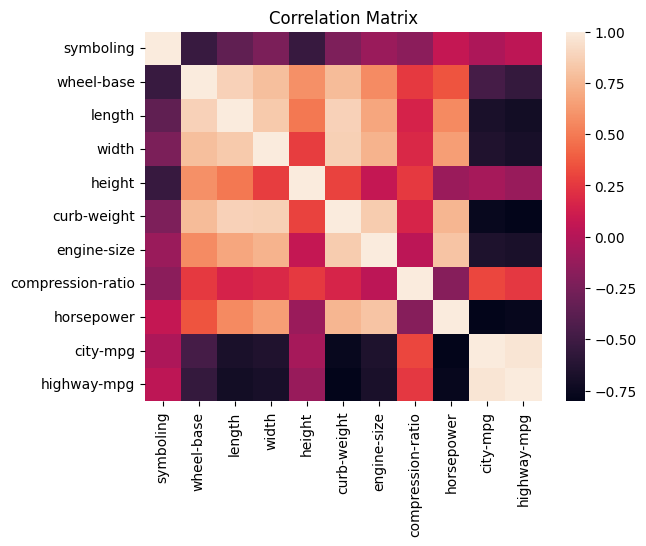

In [122]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix')
plt.show()


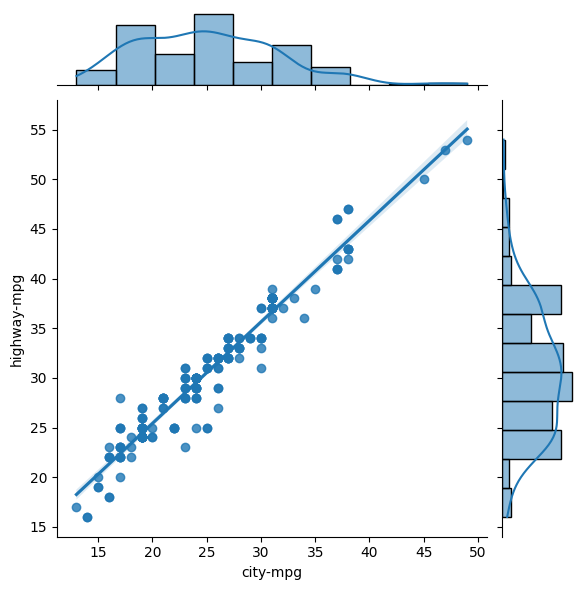

In [123]:
sns.jointplot(x='city-mpg', y='highway-mpg', data=df, kind='reg')
plt.show()


# Preprocessing dataset



In [124]:
categorical_indices = [1,2,3,4,5,6,7,8,14,15,17,18,19,21,22,25]
numerical_indices = [0,9,10,11,12,13,16,20,23,24]




In [125]:
for i in categorical_indices:
    label_encoder = LabelEncoder()
    df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))


<ipython-input-125-3620b9d16656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))
<ipython-input-125-3620b9d16656>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))
<ipython-input-125-3620b9d16656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [126]:
for i in categorical_indices:
    label_encoder = LabelEncoder()
    df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))


<ipython-input-126-3620b9d16656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))
<ipython-input-126-3620b9d16656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, i] = label_encoder.fit_transform(df.iloc[:, i].astype(str))
<ipython-input-126-3620b9d16656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [127]:
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
            'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
            'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())

   symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0          3          -0.984107     0          1           0             1   
1          3          -0.984107     0          1           0             1   
2          1          -0.984107     0          1           0             1   
3          2           0.007490     1          1           0             0   
4          2           0.007490     1          1           0             0   

   body-style  drive-wheels  engine-location  wheel-base  ...  engine-size  \
0           0             2                0   -1.689532  ...     0.070180   
1           0             2                0   -1.689532  ...     0.070180   
2           2             2                0   -0.710457  ...     0.597834   
3           3             1                0    0.169051  ...    -0.433489   
4           3             0                0    0.102673  ...     0.214086   

   fuel-system      bore    stroke  compression-ratio  horsepo

<ipython-input-127-253d7a12adc2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = scaler.fit_transform(df[num_cols])


In [128]:
numerical_columns = df.iloc[:, numerical_indices]
stats = numerical_columns.describe()
# Print the descriptive statistics
print(stats)

        symboling    wheel-base        length         width        height  \
count  203.000000  2.030000e+02  2.030000e+02  2.030000e+02  2.030000e+02   
mean     0.837438  2.283887e-15 -7.525453e-16 -3.500211e-17  9.975600e-16   
std      1.250021  1.002472e+00  1.002472e+00  1.002472e+00  1.002472e+00   
min     -2.000000 -2.021422e+00 -2.682120e+00 -2.617878e+00 -2.434444e+00   
25%      0.000000 -7.104567e-01 -6.144698e-01 -8.462917e-01 -7.106610e-01   
50%      1.000000 -2.955945e-01 -7.419983e-02 -1.936021e-01  1.512303e-01   
75%      2.000000  6.005080e-01  7.463606e-01  4.590874e-01  7.258245e-01   
max      3.000000  3.670489e+00  2.761202e+00  2.976604e+00  2.490649e+00   

        curb-weight   engine-size  compression-ratio      city-mpg  \
count  2.030000e+02  2.030000e+02       2.030000e+02  2.030000e+02   
mean   1.050063e-16  1.170383e-16       1.487589e-16 -3.937737e-17   
std    1.002472e+00  1.002472e+00       1.002472e+00  1.002472e+00   
min   -2.052525e+00 -1.584

# **ML Model and Evaluvating with metrics**


In [129]:
# Finding how length, width, height and curb-weight of a car affects the price using linear regression
X = df[['length','width','height','curb-weight']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(162, 4)
(41, 4)
(162,)
(41,)


In [130]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(X_test)

In [131]:
#Giving our own length,width,height and curb-weight as parameterized input and predicting the price
predicted_price=LinReg.predict([[168,64,49,2500]])
print(predicted_price)

[1522.63362923]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [132]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE)", mae)

Root Mean Squared Error (RMSE): 0.3379901043827164
Mean Absolute Error (MAE) 0.4192326037790689


In [133]:
#Using Gaussian Naive Bayes to classify
encoder = LabelEncoder()
df['num-of-doors'] = encoder.fit_transform(df['num-of-doors'])

# Split the dataset into training and testing sets
train_data = df.sample(frac=0.8, random_state=42)
test_data = df.drop(train_data.index)



<ipython-input-133-44051083f843>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num-of-doors'] = encoder.fit_transform(df['num-of-doors'])


In [134]:
from sklearn.naive_bayes import GaussianNB
# Extract the input features and target variable
X_train = train_data.drop('num-of-doors', axis=1)
y_train = train_data['num-of-doors']
X_test = test_data.drop('num-of-doors', axis=1)
y_test = test_data['num-of-doors']

# Create a Gaussian Naive Bayes classifier and fit it to the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)



In [135]:
from sklearn.metrics import classification_report
# Evaluate the accuracy of the model
accuracy = (y_pred == y_test).sum() / len(y_test)
print(f"Accuracy: {accuracy:.3f}")
print(classification_report(y_pred,y_test))

Accuracy: 0.756
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.52      1.00      0.69        11

    accuracy                           0.76        41
   macro avg       0.76      0.83      0.74        41
weighted avg       0.87      0.76      0.77        41

